# Let's fill the trolley!

==============================================================

# Vamos encher o carrinho!

# Introduction

Instacart is a supermarket delivery platform where customers can place an order at the supermarket and then receive their purchase, similar to how Uber Eats and iFood work. The data set we provided was modified from the original. We've reduced its size so that its calculations run more quickly and included missing and duplicate values. We were also careful to preserve the distributions of the original data when we made the changes.

You need to complete three steps. For each one, write a brief introduction describing how you intend to complete the step and justify your decisions in explanatory paragraphs as you progress through the solution. Also write a conclusion to summarize your findings and choices.

==============================================================

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Data dictionary

There are five tables in the dataset, and you'll need to use all of them to pre-process your data and do AED. Below is a dictionary that lists the columns of each table and describes the data contained in them.

- `instacart_orders.csv`: each row corresponds to an order in the Instacart application
    - `'order_id'`: is the number that uniquely identifies each order
    - `'user_id'`: is the unique identification number of each customer's account
    - `'order_number'`: is the number of times the customer has placed an order
    - `'order_dow'`: is the day of the week on which the order was placed (0 is Sunday)
    - `'order_hour_of_day'`: is the time of day the order was placed
    - `'days_since_prior_order'`: is the number of days since the customer placed their previous order




- `products.csv`: each line corresponds to a unique product that customers can buy
    - `'product_id'`: is the unique identification number of each product
    - `'product_name'`: is the name of the product
    - `'aisle_id'`: is the unique identification number of each aisle category in the supermarket
    - `'department_id'`: is the unique identification number of each department category in the supermarket
    



- `order_products.csv`: each line corresponds to an item included in an order
    - `'order_id'`: is the number that uniquely identifies each order
    - `'product_id'`: is the unique identification number of each product
    - `'add_to_cart_order'`: is the sequential order in which each item was placed in the cart
    - `'reordered'`: 0 if the customer has never bought the product before, 1 if they have already bought it




- `aisles.csv`
    - `'aisle_id'`: is the unique identification number of each aisle category in the supermarket
    - `'aisle'`: is the name of the aisle



- `departments.csv`
    - `'department_id'`: is the unique identification number of each department category in the supermarket
    - `'department'`: is the name of the department
    
==============================================================

`Dicionário de dados`

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Step 1. Overview of the data

Read the data files (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv and /datasets/order_products.csv) with `pd.read_csv()` using the appropriate parameters to do this correctly. Check the information for each DataFrame created.

==============================================================

# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Solution plan

First it's necessary to clean the data, which means checking and removing missing and duplicate values, so that once the information is more correct and easier to analyze, you can start evaluating all the necessary points.

==============================================================

## Plano de solução

Primeiro será preciso fazer a limpeza dos dados, que será verificar e remover valores ausentes e duplicados, para que uma vez que as informações estejam mais corretas e simples para análise, iniciar a avaliação de todos os pontos necessários.

In [1]:
# Import the libraries / Importe as bibliotecas

import pandas as pd # standard "libraries" / bibliotecas "padrões"
import numpy as np # standard "libraries" / bibliotecas "padrões"
from matplotlib import pyplot as plt # standard "libraries" / bibliotecas "padrões"
import seaborn as sns

In [2]:
# read the datasets in DataFrames / leia os conjuntos de dados em DataFrames

df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
df_products = pd.read_csv('/datasets/products.csv', sep = ';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
df_departments = pd.read_csv('/datasets/departments.csv', sep = ';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')

# after checking the data, sep = ';' was added to make the data display more organized / após verificação dos dados, foi adicionado o sep = ';' para deixar a visualização dos dados mais organizada

# read the data in the VSCode below / leitudas dados no VSCode abaixo:

# df_instacart_orders = pd.read_csv(r'datasets\instacart_orders.csv', sep = ';')
# df_products = pd.read_csv(r'datasets\products.csv', sep = ';')
# df_aisles = pd.read_csv(r'datasets\aisles.csv', sep = ';')
# df_departments = pd.read_csv(r'datasets\departments.csv', sep = ';')
# df_order_products = pd.read_csv(r'datasets\order_products.csv', sep = ';')

In [3]:
# information about DataFrame / informações sobre o DataFrame

df_instacart_orders.info() # prints general information / imprime informações gerais
print() # spacing line / linha de espaçamento
df_instacart_orders.head() # print the first 5 lines / imprime as 5 linhas iniciais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# information about DataFrame / informações sobre o DataFrame

df_products.info()
print()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# information about DataFrame / informações sobre o DataFrame

df_aisles.info()
print()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# information about DataFrame / informações sobre o DataFrame

df_departments.info()
print()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# information about DataFrame / informações sobre o DataFrame

df_order_products.info(show_counts=True)
print()
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusions

Write your intermediate conclusions from Step 1 here. Overview of the data



In the initial analysis we can see the following characteristics in each file:

Instacart_orders:
        - We have a total of entries = 478967;
        - We have 6 columns (order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order)
        - In the days_since_prior_order column we have 28,819 missing values, the rest are complete on first analysis
        - The columns are of type integer or float

Products:
        - We have a total of entries = 49694;
        - We have 4 columns (product_id, product_name, aisle_id, department_id)
        - At first, there are no missing values, so this is an initial analysis.
        - The columns are of type integer or object

Aisles:
        - We have a total of entries = 134;
        - We have 2 columns (aisle_id, aisle)
        - At first there are no missing values, this is a first analysis
        - The columns are of type integer or object

Departments:
        - We have a total of entries = 21;
        - We have 2 columns (department_id, department)
        - At first, there are no missing values, so this is an initial analysis
        - The columns are of type integer or object
    
Order_products:
        - We have a total of entries = 4545007;
        - We have 4 columns (order_id, product_id, add_to_cart_order, reordered)
        - In the add_to_cart_order column we have 836 missing values, the rest are complete on first analysis.
        - The columns are of type integer or float
        
==============================================================        

`Conclusões`

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados



Na análise inicial podemos perceber as seguintes características em cada arquivo:

Instacart_orders:
        - Temos um total de entradas = 478967;
        - Temos 6 colunas (order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order)
        - Na coluna days_since_prior_order  temos 28.819 valores ausentes, as restantes estão completas em uma primeira análise
        - As colunas são do tipo inteiro ou float

Products:
        - Temos um total de entradas = 49694;
        - Temos 4 colunas (product_id, product_name, aisle_id, department_id)
        - A princípio não tem valores ausentes, sendo essa uma primeira análise
        - As colunas são do tipo inteiro ou object

Aisles:
        - Temos um total de entradas = 134;
        - Temos 2 colunas (aisle_id, aisle)
        - A princípio não tem valores ausentes, sendo essa uma primeira análise
        - As colunas são do tipo inteiro ou object
    
Departments:
        - Temos um total de entradas = 21;
        - Temos 2 colunas (department_id, department)
        - A princípio não tem valores ausentes, sendo essa uma primeira análise
        - As colunas são do tipo inteiro ou object
    
Order_products:
        - Temos um total de entradas = 4545007;
        - Temos 4 colunas (order_id, product_id, add_to_cart_order, reordered)
        - Na coluna add_to_cart_order  temos 836 valores ausentes, as restantes estão completas em uma primeira análise
        - As colunas são do tipo inteiro ou float

# Step 2. Data preparation

Pre-process the data as follows:

- Check and correct the data types (for example, make sure the ID columns are whole numbers).
- Identify and fill in missing values
- Identify and remove duplicate values

Make sure you explain what types of missing and duplicate values you found, how you filled or removed them, why you chose these methods and why you think these missing and duplicate values were present in the dataset.

==============================================================

`Etapa 2. Preparação de dados`

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Solution plan

For step 2 I have already checked, with the information requested before, that the columns are all lowercase, separated by _ and the ID columns are all as int. I'll also check that there are no trailing spaces to ensure that the columns are named correctly.

After that, I'll check to see whether or not there are any missing/duplicate values and clean up as necessary, either by removing the information from the dataframe or by replacing it.

==============================================================

`Plano de solução`

Para a etapa 2 já verifiquei, com as informaçõe solicitadas antes, de que as colunas estão todas com letras minúsculas, separadas por _ e as colunas de ID estão todas como int. Além disso, vou verificar se não existe espaços final para garantir que as colunas estão nomeadas corretamente.

Depois disso, irei verificar identificar se há ou não valores ausentes/duplicados e limpar tudo o que for preciso, seja removendo as informações do dataframe ou substituindo.

## Find and remove duplicate values (and describe why you are making your choices)

==============================================================

`Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)`

### DataFrame `instacart_orders`

In [59]:
# Check for duplicate orders / Verificar se há pedidos duplicados

print(df_instacart_orders[df_instacart_orders.duplicated()]) # prints all duplicate values / imprime todos valores duplicados
print() # blank space to skip 1 line and facilitate visualization / espaço em branco para saltar 1 linha e facilitar visualização
print(df_instacart_orders.duplicated().sum()) # sum of duplicate values / soma dos valores duplicados

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

0


Are there duplicate lines? If so, what do they have in common?

Yes, we have 15 rows with duplicate values. They have duplicate data in the 'order_dow' and 'order_hour_of_day' columns.

==============================================================

Há linhas duplicadas? Se sim, o que elas têm em comum?

Sim, temos 15 linhas com valores duplicados. Elas têm em comum dados duplicados na coluna 'order_dow' e 'order_hour_of_day'.

In [9]:
# Based on your findings / Com base nas suas conclusões,

# check all orders placed at 2 a.m. on Wednesdays / verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

orders_2am_wednesday = df_instacart_orders[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3)] # filter for orders placed at 2 a.m. on Wednesdays / filtro para pedidos feitos às 2h da manhã nas quartas-feiras

orders_2am_wednesday

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


What does this result mean?

We have a total of 121 requests made at 2am on Wednesday morning

==============================================================

O que esse resultado quer dizer?

Temos um total de 121 pedidos feitos às 2h da manhã de quarta-feira

In [10]:
# Remove duplicate orders / Remova pedidos duplicados

df_instacart_orders = df_instacart_orders.drop_duplicates()

In [11]:
# Check the duplicate lines one more time / Verifique as linhas duplicadas mais uma vez

df_instacart_orders.duplicated().sum()

0

In [12]:
# Recheck only duplicate order IDs / Verifique novamente apenas os IDs de pedidos duplicados

orders_2am_wednesday = df_instacart_orders[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3)]

orders_2am_wednesday

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Briefly describe your findings and what you did with them.

In this step we found that the instacart_orders dataframe had a total of 15 rows with duplicate values. We ran an analysis of the orders placed at 2 a.m. on Wednesday (assuming Sunday is 0, Wednesday will be 3 as used, corresponding to the 'order_dow' column) which returned 121 rows on this day and time. After this process, the duplicate values were cleaned up and, as expected, the result was 106 rows.

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Neste passo verificamos que o dataframe instacart_orders tinha um total de 15 linhas com valores duplicados. Fizemos uma análise dos pedidos feitos às 2h da manhã de quarta-feira (assumindo que domingo ser]a 0, quarta-feira será 3 como utilizado, correspondente a coluna 'order_dow') em que retornou 121 linhas neste dia e hora. Após este processo, foi feita a limpeza dos valores duplicados e como esperado o resultou foi manter 106 linhas.

### DataFrame `products`

In [60]:
# Check for completely duplicated lines / Verifique se há linhas completamente duplicadas

print(df_products[df_products.duplicated()])
print()
print(df_products.duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

0


In [63]:
# Check only duplicate product IDs / Verifique apenas IDs dos produtos duplicados

duplicated_product_id = df_products[df_products.duplicated(subset = ['product_id'])] # created variable that will access the 'products' dataframe and the product_id column with order / criada variável que irá acessar o dataframe 'products' e a coluna product_id com pedido
duplicated_product_id

,product_id,product_name,aisle_id,department_id


In [15]:
# Check only duplicate product names (convert names to lower case for a better comparison) / Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

df_products['product_name'].str.lower() # turns letters into lower case / transforma letras em minúsculas
duplicated_product_name = df_products.duplicated(subset = ['product_name']) # filter for 'product_name' column / filtro para coluna 'product_name'
duplicated_product_name

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool

In [16]:
# Check for duplicate product names that are not missing / Verifique os nomes de produtos duplicados que não estão faltando

missing_names = df_products[df_products['product_name'].notna()] # filter that checks for values that are not NaN and returns False if it finds NaN values / filtro que verifica valores que não são NaN e retorna False em caso de encontrar valores NaN
duplicated_names = missing_names[missing_names.duplicated('product_name', keep=False)] # analyze duplicates in the 'product_name' column, together with the filter above / analisar duplicados na coluna 'product_name', juntamente com o filtro acima

duplicated_names.sum()

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

Briefly describe your conclusions and what you did with them.

For the products dataframe we can see that there are no duplicate values, and we can also conclude that there are no missing values. To reach this conclusion I first checked for duplicate values in the dataframe in general and then performed a sub-analysis on the 'product_id' and 'product_name' columns.

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Para o dataframa products podemos verificar que não existem valores em duplicados, além de também podemos concluir que não há valores em falta/ausentes. Para chegar a essa conclusão primeiro verifiquei se existia valores em duplicados no dataframe de modo geral e após isso feita uma sub-análise nas colunas 'product_id' e 'product_name'.

### DataFrame `departments`

In [64]:
# Check for completely duplicated lines / Verifique se há linhas completamente duplicadas

print(df_departments[df_departments.duplicated()])
print()
df_departments.duplicated().sum()

Empty DataFrame
Columns: [department_id, department]
Index: []



0

In [18]:
# Check only for duplicate product IDs / Verifique apenas se há IDs dos produtos duplicados

duplicated_departament_id_departament = df_departments[df_departments.duplicated(subset = ['department_id'])]
duplicated_departament_id_departament.sum()

department_id    0.0
department       0.0
dtype: float64

Briefly describe your conclusions and what you did with them.

As with 'products', the 'departments' dataframe also has no duplicate data. To reach this conclusion, I first checked for duplicate values in the dataframe in general and then performed a sub-analysis on the 'product_id' column.

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Assim como em 'products', o dataframe 'departments' também não tem nenhum dado duplicado. Para chegar a essa conclusão primeiro verifiquei se existia valores em duplicados no dataframe de modo geral e após isso feita uma sub-análise na coluna 'product_id'.

### DataFrame `aisles`

In [65]:
# Check for completely duplicate lines / Verifique se há linhas completamente duplicadas

print(df_aisles[df_aisles.duplicated()])
print()
df_aisles.duplicated().sum()

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []



0

In [20]:
# Check only for duplicate product IDs / Verifique apenas se há IDs dos produtos duplicados

duplicated_aisles_id = df_aisles[df_aisles.duplicated(subset = ['aisle_id'])]
duplicated_aisles_id.sum()

aisle_id    0.0
aisle       0.0
dtype: float64

Briefly describe your conclusions and what you did with them.

This is another dataframe that has no duplicates in its data, so there is no need to clean it up. To reach this conclusion, we checked the dataframe in general and then directly in the 'aisle_id' column, which also returned no duplicate values.

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Este é mais um dataframe que não tem duplicados em seus dados, não sendo preciso limpeza dos mesmo. Para chegar a essa conclusão foi feita uma verificação de modo geral do dataframe e depois diretamente na coluna 'aisle_id', que também retornou sem valores duplicados.

### DataFrame `order_products`

In [66]:
# Check for completely duplicate lines / Verifique se há linhas completamente duplicadas

print(df_order_products[df_order_products.duplicated()])
print()
print(df_order_products.duplicated().sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

0


In [22]:
# Check again for other complicated cases of duplicates / Verifique mais uma vez se há outros casos complicados de duplicados

duplicated_order_id = df_order_products[df_order_products.duplicated(subset = ['order_id', 'product_id', 'add_to_cart_order', 'reordered'])]
print(duplicated_order_id.sum())

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


Briefly describe your conclusions and what you did with them.

Again, another dataframe that has no duplicates in its data, so there's no need to clean it up. To reach this conclusion, a general check was made of the dataframe and then directly on the 'order_id', 'product_id', 'add_to_cart_order', 'reordered' columns, which also returned no duplicate values.

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Novamente outro dataframe que não tem duplicados em seus dados, não sendo preciso limpeza dos mesmo. Para chegar a essa conclusão foi feita uma verificação de modo geral do dataframe e depois diretamente nas colunas 'order_id', 'product_id', 'add_to_cart_order', 'reordered', que também retornou sem valores duplicados.

## Find and remove missing values


As we process duplicate values, we notice that we also have missing values that we need to investigate in the following columns:

* The `'product_name'` column from the products table.
* The `'days_since_prior_order'` column in the orders table.
* The `'add_to_cart_order'` column in the order_products table.

==============================================================

`Encontre e remova valores ausentes`


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
# Find missing values in the 'product_name' column / Encontre valores ausentes na coluna 'product_name'

print(df_products['product_name'].isna().sum()) # check the number of absentees / verificar número de ausentes
print()
df_products[df_products['product_name'].isna()] # prints all missing values / imprime todos valores ausentes

1258



,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Descreva brevemente suas conclusões.

Para a coluna 'product_name' do dataframe 'products' temos um total de 1258 valores ausentes (NaN), onde podemos também perceber que estes valores ausentes tem todos valores iguals nas colunas 'aisle_id' e 'department_id'.

In [24]:
# Are all the missing product names associated with aisle ID 100? / Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

check_ID_21 = df_products[(df_products['product_name'].isna()) & ~(df_products['department_id'].isna())]
check_ID_21

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Briefly describe your conclusions.

Yes, all the missing products are associated with the 'aisle_id / 100' column. We can conclude this since the numbers from this check match the previous check.

==============================================================

Descreva brevemente suas conclusões.

Sim, todos os produtos ausentes estão associados com o a coluna 'aisle_id / 100'. Podemos concluir isso umas vez que os números dessa checagem batem com a checagem anterior.

In [25]:
# Are all the missing product names associated with department ID 21? / Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

check_ID_21 = df_products[(df_products['product_name'].isna()) & ~(df_products['department_id'].isna())]
check_ID_21

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Briefly describe your findings.

Like the previous one, all the missing products are associated with the 'department_id / 21' column. We can conclude this since the numbers in this check are from the 'aisle_id / 100' column and the initial check.

==============================================================

Descreva brevemente suas conclusões.

Assim como o anterior, todos os produtos ausentes estão associados com o a coluna 'department_id / 21'. Podemos concluir isso umas vez que os números dessa checagem feita da coluna 'aisle_id / 100' e com a checagem inicial.

In [68]:
# Use the department and aisle tables to check the data for the corridor with ID 100 and the department with ID 21. / Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.

aisle_info = df_aisles[df_aisles['aisle_id'] == 100] # filter to access column 'aisle_id' and if it is = 100 return information / filtro para acessar coluna 'aisle_id' e se for = 100 retornar informação
print("Informações do corredor com ID 100:") # writing to make the print more visual / escrita para deixar mais visual a impressão
print(aisle_info) # feedback filter done / retorno informação filtro feito

print()

departament_info = df_departments[df_departments['department_id'] == 21] # filter to access column 'department_id' and if = 21 return information / filtro para acessar coluna 'department_id' e se for = 21 retornar informação
print("Informações do corredor com ID 21:") # writing to make the print more visual / escrita para deixar mais visual a impressão
print(departament_info) # feedback filter done / retorno informação filtro feito

Informações do corredor com ID 100:
    aisle_id    aisle
99       100  missing

Informações do corredor com ID 21:
    department_id department
20             21    missing


Briefly describe your conclusions.

We can see that the information corresponding to ID 100 in aisle and ID 21 in department is missing.

==============================================================

Descreva brevemente suas conclusões.

Podemos ver que as informações correspondente ao ID 100 em aisle e ID 21 em department estão em falta.

In [27]:
# Fill in missing product names with 'Unknown' / Preencha nomes de produtos ausentes com 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown') # replace missing values with 'Unknown' / substituir valores ausente por 'Unknown'

product_Unknown = df_products[df_products['product_name'] == 'Unknown'] # filter for values equal to 'Unknown' in the 'product_name' column / filtro para valores que sejam iguais a 'Unknown' na coluna 'product_name'

product_Unknown # print result filter / impressão resultado filtro

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


Briefly describe your conclusions and what you did with them.

You have replaced the missing values with 'Unknown' and you can see that you have changed all the values as they are the same 1258 initial values.

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Feita substituição dos valores ausente por 'Unknown' e pode verificar que foi alterado todos os valores pois são os mesmos 1258 valores iniciais.

### DataFrame `orders`

In [28]:
# Find the missing values / Encontre os valores ausentes

df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# Are there missing values for customers who are not placing their first order? / Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

check_first_order = df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna()) & (df_instacart_orders['order_number'] != 1)] # the first filter checks for missing values and the second checks for orders other than 1, the first not being ordered / primeiro filtro verifica valores ausentes e o segundo verifica ordens diferentes de 1, não sendo o primeiro pedido
check_first_order.sum()                                       

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

Briefly describe your conclusions and what you did with them.

For the 'df_instacart_orders' dataframe we can see that we have 28817 missing values in the 'days_since_prior_order' column, however, none of these missing values are customers who are not placing their first order.

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Para o dataframe 'df_instacart_orders' podemos verificar que temos 28817 valores ausentes na coluna 'days_since_prior_order', contudo, nenhum destes valores ausentes são clientes que não estão fazendo o primeiro pedido.

### DataFrame `order_products`

In [30]:
# Find the missing values / Encontre os valores ausentes

df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# What are the minimum and maximum values of this column? / Quais são os valores mínimo e máximo dessa coluna?

max_value = df_order_products['add_to_cart_order'].max()
min_value = df_order_products['add_to_cart_order'].min()

print('O valor máximo da coluna "add_to_cart_order" é: {}'.format(max_value))
print('O valor mínimo da coluna "add_to_cart_order" é: {}'.format(min_value))

O valor máximo da coluna "add_to_cart_order" é: 64.0
O valor mínimo da coluna "add_to_cart_order" é: 1.0


Briefly describe your findings.

We have identified that the 'add_to_cart_order' column has a total of 836 missing values, where the maximum value of items added to the shopping cart is 64 and the minimum is 1.

==============================================================

Descreva brevemente suas conclusões.

Identificamos que a coluna 'add_to_cart_order' tem um total de 836 valores ausentes, onde o valor máximo de itens adicionados ao carrinho de compra são 64 e o mínimo é 1.

In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order' / Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

ids_nan = df_order_products[df_order_products['add_to_cart_order'].isna()]
orders_id_with_nan = ids_nan['order_id']
ids_nan

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# Do all orders with missing values contain more than 64 products? / Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Group orders with missing data by order ID / Agrupe os pedidos com dados ausentes por ID de pedido
# Count the number of 'product_id' in each order and check the minimum value of the count / Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

ids_nan = df_order_products[df_order_products['add_to_cart_order'].isna()]
new_ids_nan = ids_nan.groupby('order_id')['product_id'].count()
all_orders_64 = (new_ids_nan > 64).all()
all_orders_64
print(new_ids_nan.min())

1


Briefly describe your conclusions.

Through our analysis, we were able to identify that not all orders contain more than 64 products, and that the minimum value in 'product_id' is 1.

==============================================================

Descreva brevemente suas conclusões.

Com a análise feita conseguirmos identificar que não são todos os pedidos que contêm mais de 64 produtos, além de que o valor mínimo em 'product_id' é 1.

In [34]:
# Replace missing values in the 'add_to_cart_order' column with 999 and convert the column to integer type / Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna('999').astype('int') # replacing the missing values with 999 and changing the column to type int / substituição dos valores ausentes por 999 e alteração para o tipo int a coluna
changed_values = df_order_products[df_order_products['add_to_cart_order'] == 999] # filter to print all data that has 999 in the 'add_to_cart_order' column / filtro para imprimir todos os dados que tem 999 na coluna 'add_to_cart_order'
print(changed_values.isna().sum()) # check missing values for confirmation / checagem valores ausentes para confirmação
changed_values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
...,...,...,...,...
4505662,1800005,7411,999,0
4511400,1633337,260,999,0
4517562,404157,9517,999,0
4534112,1673227,17835,999,0


Briefly describe your conclusions and what you did with them.

Replaced the 'NaN' values with 999 as requested and confirmed that all NaN values (836) were changed

==============================================================

Descreva brevemente suas conclusões e o que você fez com elas.

Feita substituição dos valores 'NaN' por 999 como solicitado e confirmado que todos os valores NaN (836) foram alterados

## Conclusions

All the duplicate and missing values were checked, and the duplicate data was cleaned, for example in the 'instacart_orders' dataframe there were initially a total of 121 orders in the orders at 2 a.m., but only 106 after cleaning, and replacement of the NaN values that were necessary (changed to 'Unknown' and '999').

We also found that in the 'products' dataframe, before the missing values were replaced, they were all related to the 'aisle_id' and 'department_id' columns.

In the 'instacart_orders' dataframe, none of the missing values correspond to customers who are in the first order

And for the 'order_products' dataframe we have a maximum value of items added to the cart of 64 and a minimum value of 1.

==============================================================

`Conclusões`

Foi feita toda a verificação de valores duplicados e ausentes, sendo feita a limpeza dos dados duplicados, como por exemplo no dataframe 'instacart_orders' nos pedidos às 2h da manhã tinha inicialmente um total de 121 pedidos que ficaram vapenas 106 após a limpeza, e substituição dos valores NaN que eram necessário (alterados para 'Unknown' e '999').

Além disso também identificamos que no dataframe 'products', antes de ser feita a substituição dos valores ausentes, estes estão todos relacionados com as colunas 'aisle_id' e 'department_id'.

Já no dataframe 'instacart_orders' nenhum dos valores ausentes correspondem a clientes que estão no primeiro pedido

E para o dataframe 'order_products' temos um valor máximo de itens adicionados ao carrinho de 64 e um valor mínimo de 1.

# Step 3. Data analysis

When the data is processed and ready, run the following analysis:

==============================================================

`Etapa 3. Análise de dados`

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Easy (you must complete everything to pass)

1.	Check that the values in the `'order_hour_of_day'` and `'order_dow'` columns in the `orders` table make sense (i.e. the values in the `'order_hour_of_day'` column range from 0 to 23 and those in `'order_dow'` range from 0 to 6).
2.	Create a graph showing how many people place orders at each hour of the day.
3.	Create a graph showing which day of the week people shop.
4.	Create a graph showing how long people wait before placing their next order and comment on the minimum and maximum values.

==============================================================

`[A] Fácil (é necessário concluir tudo para passar)`

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Check that the values make sense

==============================================================

`[A1] Verifique se os valores fazem sentido`

In [35]:
check_order_hour_of_day = ((df_instacart_orders['order_hour_of_day'] >= 0) & (df_instacart_orders['order_hour_of_day'] <= 23)).all() # checking if values are within the desired parameters, if all are returns True, otherwise False / verificando se valores estão dentro dos parâmetros desejados, se todos estiverem retorna True, caso contrário False
check_order_hour_of_day

True

In [36]:
check_order_dow = ((df_instacart_orders['order_dow'] >= 0) & (df_instacart_orders['order_dow'] <= 6)).all()
check_order_dow

True

Write your conclusions here

We can see that the information returned is 'True' and so the values in the 'order_hour_of_day' and 'order_dow' columns make sense and are within the correct values.

==============================================================

Escreva suas conclusões aqui

Podemos ver que a informação retornada é 'True' e sendo assim os valores existentes nas colunas 'order_hour_of_day' e 'order_dow' fazem sentido e estão dentro dos valores corretos.

### [A2] How many people place orders every hour of the day?

==============================================================

`[A2] Quantas pessoas fazem pedidos a cada hora do dia?`

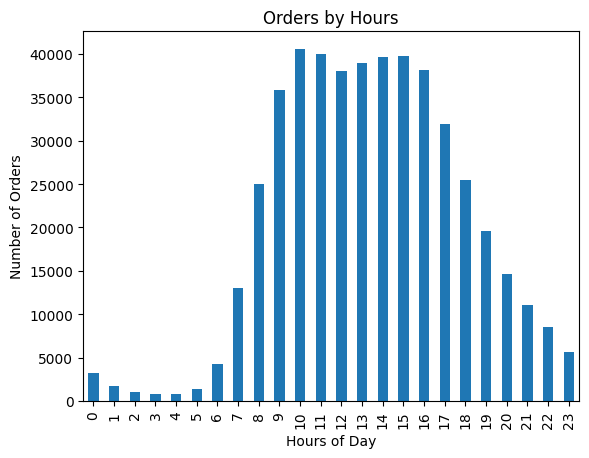

In [37]:
df_instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'Orders by Hours',
    style = 'bar',
    xlabel = 'Hours of Day',
    ylabel = 'Number of Orders') # code to count values from the 'order_hour_of_day' column and sort the index in the chart, then print the data in a bar chart / código para contar valores da coluna 'order_hour_of_day' e ordenar o index no gráfico, depois imprimir os dados em um gráfico de barras
plt.show()

Write your conclusions here

According to the graph, there is a large volume of purchases between 10 a.m. and 4 p.m., with 10 a.m. being the main purchase time with the highest volume of orders. In addition, I can see an average volume of purchases at 07:00 / 08:00 / 18:00 / 19:00. In the early hours of the morning, the volume of purchases is very small, with the lowest levels at 03:00 and 04:00.

==============================================================

Escreva suas conclusões aqui

Conforme o gráfico, existe um grande volume de compras entre às 10h e 16h, tendo o horário das 10h como o principal horário de compra com um maior volume de ordens. Além disso, identifico um volume de compra médios nos horários: 07h / 08h / 18h / 19h. Já na madrugada o volume de compras é muito pequeno, tendo o menor índice nos horários das 03h e 04h.

### [A3] What day of the week do people buy food?

==============================================================

`[A3] Em que dia da semana as pessoas compram produtos alimentícios?`

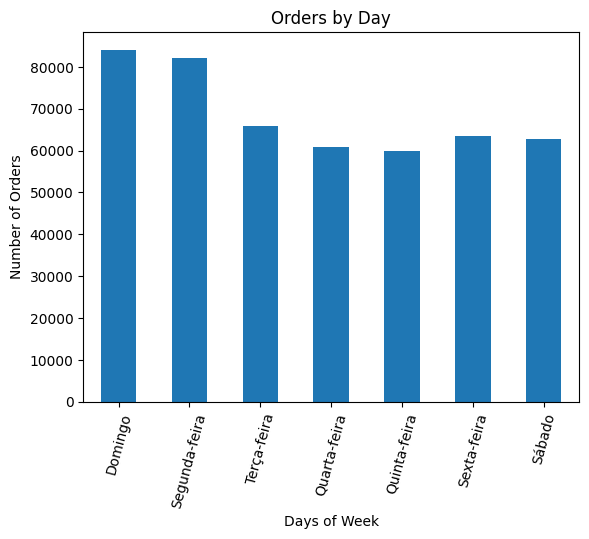

In [38]:
days_of_week = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']

df_instacart_orders['order_dow'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'Orders by Day',
    style = 'bar',
    xlabel = 'Days of Week',
    ylabel = 'Number of Orders') # code to count values from the 'order_dow' column and sort the index in the chart, then print the data in a bar chart / código para contar valores da coluna 'order_dow' e ordenar o index no gráfico, depois imprimir os dados em um gráfico de barras

plt.xticks(ticks=range(7), labels=days_of_week, rotation=75)
plt.show()

Write your conclusions here

According to the graph above, the days with the highest volume of food purchases are Sunday and Monday, with a slight difference between these days, the former being the day with the highest number of purchases respectively.

==============================================================

Escreva suas conclusões aqui

Conforme o gráfico acima, os dias com maior volume de compras de produtos alimentícios é no domingo e segunda, tendo uma pequena diferença entre estes dias sendo o primeiro o dia com maior número de compras respectivamente.

### [A4] How long do people wait before placing another order?

==============================================================

`[A4] Quanto tempo as pessoas esperam até fazer outro pedido?`

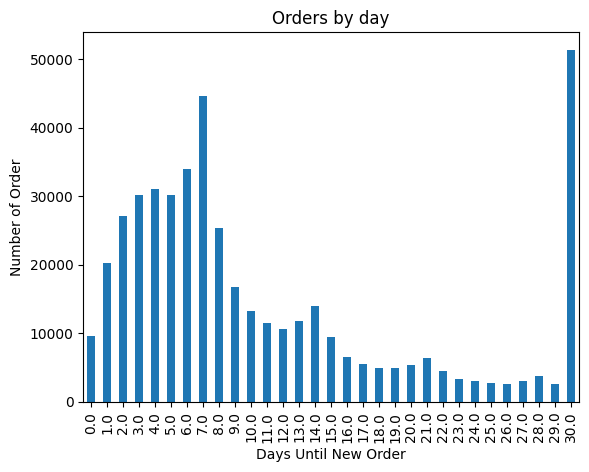

In [39]:
df_instacart_orders['days_since_prior_order'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'Orders by day',
    style = 'bar',
    xlabel = 'Days Until New Order',
    ylabel = 'Number of Order') # code to count values from the 'days_since_prior_order' column and sort the index in the chart, then print the data in a bar chart / código para contar valores da coluna 'days_since_prior_order' e ordenar o index no gráfico, depois imprimir os dados em um gráfico de barras
plt.show()

Write your conclusions here

We can see that most people wait 30 days to place another order, however, we can see that between 2 and 8 days there is a considerable number of people who place another order, with the second highest peak on the 7th day.

==============================================================

Escreva suas conclusões aqui

Podemos ver que a maioria das pessoas esperam 30 dias para fazer um outro pedido, contudo, podemos perceber que entre 2 a 8 dias existe um número considerável de pessoas que fazem outro pedido, sendo o segundo maior pico no 7º dia.

# [B] Medium (it is necessary to complete everything to pass)

1.	Is there any difference in the distribution of `'order_hour_of_day'` on Wednesdays and Saturdays? Build bar charts for both days on the same chart and describe the differences you noticed.
2.	Build a distribution chart for the number of orders customers make (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	What are the 20 most frequently purchased products? Show IDs and names.

==============================================================

`[B] Médio (é necessário concluir tudo para passar)`

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Differences on Wednesdays and Saturdays in `'order_hour_of_day'`. Create bar charts for both days and describe the differences.

==============================================================

`[B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.`

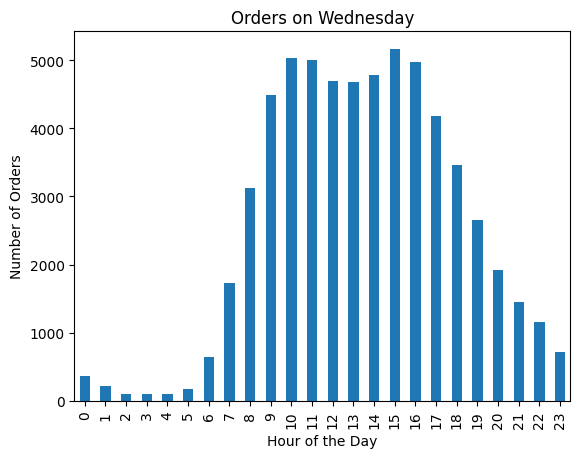

In [40]:
wednesday = df_instacart_orders[df_instacart_orders['order_dow'] == 3] # filter for wednesday / filtro para quarta-feira
wednesday_orders = wednesday['order_hour_of_day'].value_counts().sort_index() # counting of values corresponding to this day / contagem dos valores correspondente a este dia

wednesday_orders.plot(
    kind = 'bar',
    title = 'Orders on Wednesday',
    xlabel = 'Hour of the Day',
    ylabel = 'Number of Orders') # graph for data display / gráfico para exibição dos dados

plt.show()

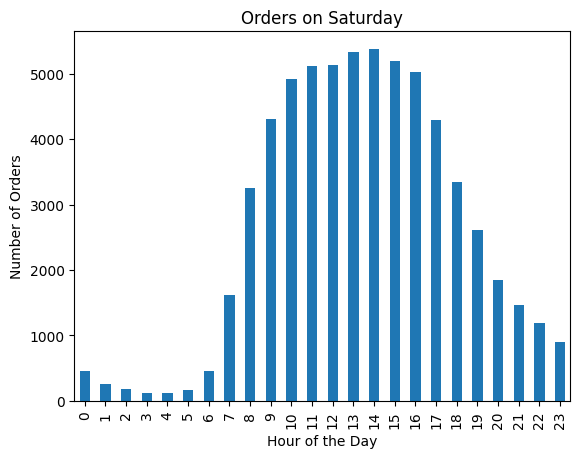

In [41]:
saturday = df_instacart_orders[df_instacart_orders['order_dow'] == 6] # filter for saturday / filtro para sábado
saturday_orders = saturday['order_hour_of_day'].value_counts().sort_index() # counting of values corresponding to this day / contagem dos valores correspondente a este dia

saturday_orders.plot(
    kind = 'bar',
    title = 'Orders on Saturday',
    xlabel = 'Hour of the Day',
    ylabel = 'Number of Orders') # graph for data display / gráfico para exibição dos dados

plt.show()

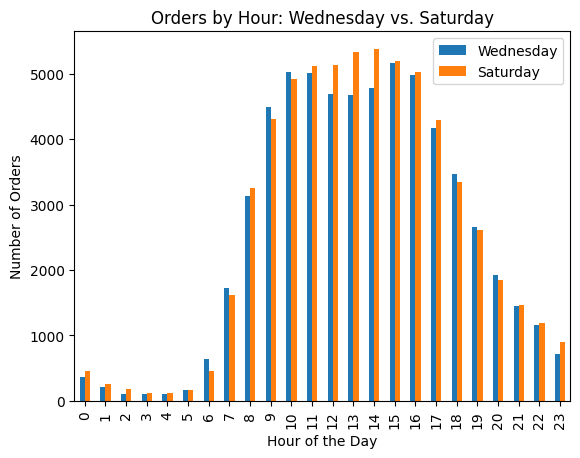

In [42]:
combined_orders = pd.DataFrame({'Wednesday': wednesday_orders, 'Saturday': saturday_orders}) # combination of days we want to analyze / combinação dos dias que desejamos analisar

combined_orders.plot(
    kind = 'bar',
    title = 'Orders by Hour: Wednesday vs. Saturday',
    xlabel = 'Hour of the Day',
    ylabel = 'Number of Orders') # chart to be displayed / gráfico a ser apresentado

plt.legend(['Wednesday', 'Saturday']) # chart legend / legenda do gráfico

plt.show()

Write your conclusions here

There is some difference in the distribution between Wednesday and Saturday, this being greater and more noticeable in the time from 10 a.m. to 3 p.m., however, in the other hours and even in the early part of the morning the values are similar goods with differences that are not so big / considerable.

==============================================================

Escreva suas conclusões aqui

Existe sim alguma diferença na distribuição entre quarta e sábado, sendo essa maior e mais notável no horário das 10h às 15h, contudo, nos demais horários e até mesmo na parte da madrugada os valores são bens semelhantes com diferenças que não são tão grandes/consideráveis.

### [B2] What is the distribution of the number of orders per customer?

==============================================================

`[B2] Qual é a distribuição do número de pedidos por cliente?`

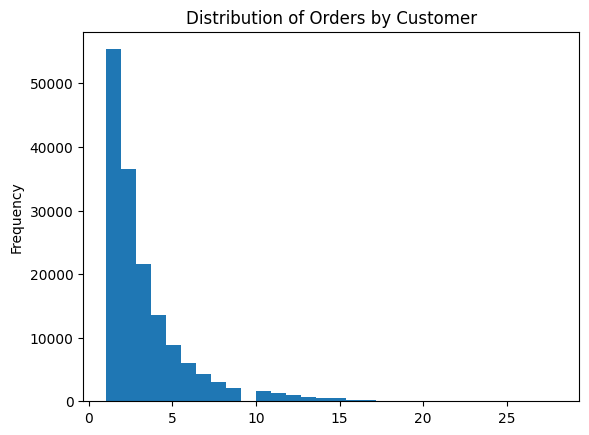

In [43]:
order_per_client = df_instacart_orders['user_id'].value_counts() # counting the values in the 'user_id' column / contagem dos valores na coluna 'user_id'

order_per_client.plot(
    kind = 'hist',
    bins = 30,
    title = 'Distribution of Orders by Customer',
    xlabel = 'Number of orders',
    ylabel = 'Number of Customers')


plt.show()

Write your conclusions here

We can note that the vast majority of customers make few orders, as more data volume at the beginning of the chart, having a very large drop as the number of orders increases.

==============================================================

Escreva suas conclusões aqui

Podemos notar que a grande maioria dos clientes fazem poucos pedidos, conforme maior volume de dados ao início do gráfico, tendo uma queda muito grande conforme o número de pedidos aumenta.

### [B3] What are the 20 most popular products? Show IDs and names.

==============================================================

`[B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.`

In [44]:
count_products = df_order_products['product_id'].value_counts() # counting values in the 'product_id' column in the dataframe 'order_products' / contagem dos valores na coluna 'product_id' no dataframe 'order_products'

In [45]:
product_counts_df = count_products.reset_index() # index correction after previous count / correção do index após contagem anterior
product_counts_df.columns = ['product_id', 'order_count'] # columns name definition / definição nome colunas
merged_df = product_counts_df.merge(
                                    df_products,
                                    left_on = 'product_id',
                                    right_on = 'product_id'
                                    ) # combination of the 'order_products' dataframe with the 'products 'dataframe / combinação do dataframe 'order_products' com o dataframe 'products'

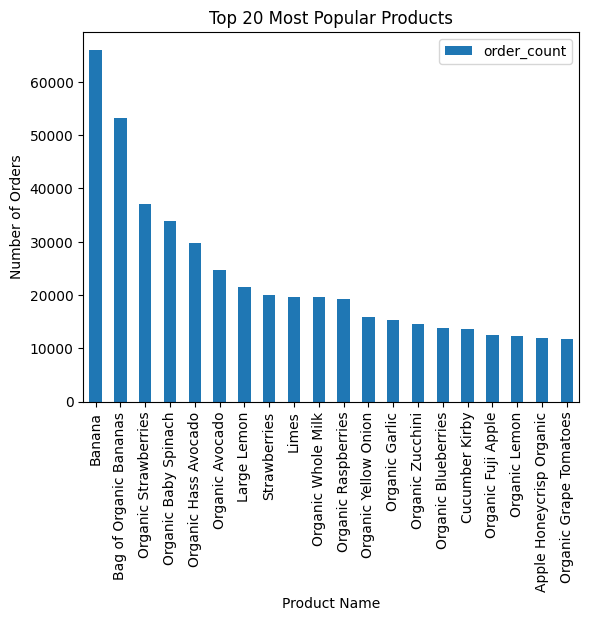

In [46]:
top_20_products = merged_df.sort_values(by='order_count', ascending=False).head(20) # checking the 20 most popular products / verificação dos 20 produtos mais populares

top_20_products[['product_id', 'product_name', 'order_count']] # print the 20 most popular products / imprime os 20 produtos mais populares

top_20_products.plot(
    kind = 'bar',
    title = 'Top 20 Most Popular Products',
    x = 'product_name',
    y = 'order_count',
    xlabel = 'Product Name',
    ylabel = 'Number of Orders',
    rot = 90
)

plt.show()

Write your conclusions here

We managed to identify that the best-selling item, taking the first and second place, are bananas, the first lines being the indication of only Banana while the second is Organic Banana, and that the last item of our list Tomato Organic Grape (o famoso Tomate Cereja). However, it is interesting to note that the vast majority of the list of purchased items are vegetables or fruits.

==============================================================

Escreva suas conclusões aqui

Conseguimos identificar que o item mais vendido, tendo o primeiro e segundo lugar, são bananas, sendo a primeira linhas a indicação de apenas Banana enquanto o segundo é Banana Orgânica,  e que o último item da nossa lista Tomate Grape Orgânico (o famoso Tomate Cereja). Porém é interessante perceber que a grande maioria da lista dos itens comprados são verduras ou frutas.

# [C] Difficult (it is necessary to complete at least two questions to pass)

1.	How many items do people normally buy in one order? How's the distribution?
2.	What are the top 20 items most often included in repeated requests? Show IDs and names.
3.	For each product, what percentage of your orders are repeated? Create a table with columns of ID and product name and the ratio of repeated orders.
4.	For each customer, what percentage of all your orders are repeated?
5.	What are the top 20 items that people put in carts before everyone else? Display the product ID, name and the number of times it was first added to a cart.

==============================================================

`[C] Difícil (é necessário concluir pelo menos duas perguntas para passar)`

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] How many items do people normally buy in one order? How's the distribution?

==============================================================

`[C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?`

In [47]:
count_products_ordered = df_order_products.groupby('order_id')['product_id'].count() # counting of products for each order made / contagem dos produtos por cada ordem feita

In [48]:
print("A média dos produtos comprados é de {:.0f} itens por pedido.".format(count_products_ordered.mean())) # print the average of products per order / imprime a média dos produtos por pedido

A média dos produtos comprados é de 10 itens por pedido.


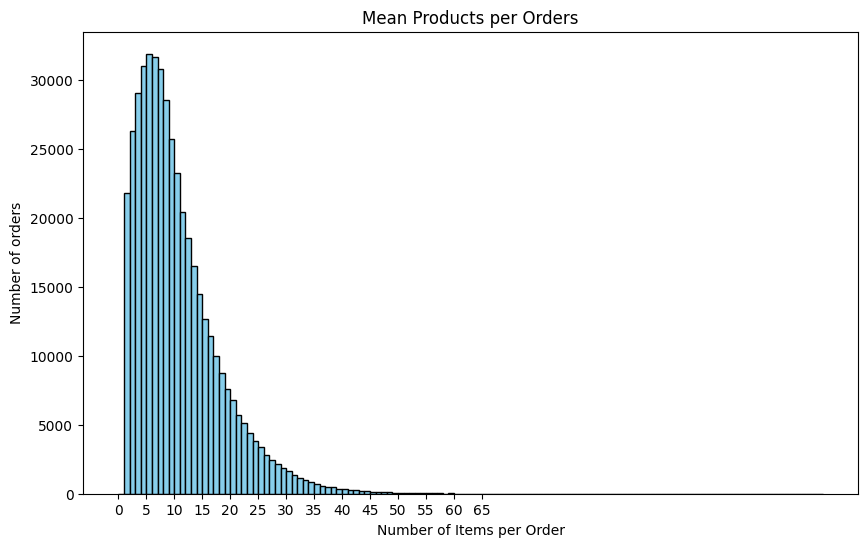

In [49]:
count_products_ordered.plot(
    kind = 'hist',
    title = 'Mean Products per Orders',
    bins = range(count_products_ordered.max()),
    figsize = (10, 6),
    edgecolor='black', # serves to add a edge of the chosen color to the bars of the graph / adicionar uma borda da cor escolhida às barras do gráfico
    color='skyblue' # change the color of the bars of the chart / alterar cor das barras do gráfico
    )

plt.xticks(range(0, 70, 5)) # define the beginning and end values of the 'x' axis in this case, as well as what the size of spacing in the values we want that was chosen from 10 in 10 / definir os valores de início e fim do eixo 'x' neste caso, bem como qual o tamanho de espaçamento nos valores que queremos que foi escolhido de 10 em 10
plt.xlabel('Number of Items per Order')
plt.ylabel('Number of orders')
plt.show()

Write your conclusions here

We were able to identify that on average an order will have 10 items, however, as the graph made we can notice that the orders have a higher volume when made up to 10 to 13 and has a very large drop when orders 15 or more items.

==============================================================

Escreva suas conclusões aqui

Conseguimos identificar que em médio um pedido terá 10 itens, contudo, conforme o gráfico feito podemos notar que os pedidos tem um maior volume quando feito até 10 a 13 e tem uma queda muito grande quando são pedidos 15 ou mais itens.

### [C2] What are the top 20 items most often included in repeat requests? Show IDs and names.

==============================================================

`[C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.`

In [50]:
count_20_products_ordered = df_order_products.groupby('order_id')['reordered'].count() # count of products that are ordered again / contagem dos produtos que são pedidos novamente

In [51]:
top_20_product_counts_df = count_20_products_ordered.reset_index() # index correction after previous count / correção do index após contagem anterior
top_20_product_counts_df.columns = ['product_id', 'reordered'] # columns name definition / definição nome colunas
merged_df_20_products = top_20_product_counts_df.merge(
                                                        df_products,
                                                        left_on = 'product_id',
                                                        right_on = 'product_id'
                                                        ) # combination of the 'order_products' dataframe with the 'products 'dataframe / combinação do dataframe 'order_products' com o dataframe 'products'

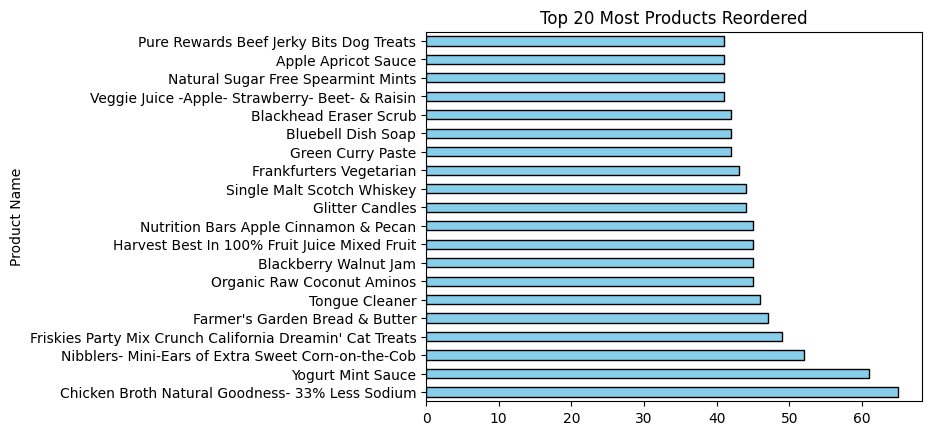

In [70]:
top_20_products_repeated = merged_df_20_products.sort_values(by='reordered', ascending=False).head(20) # checking the 20 most popular products / verificação dos 20 produtos mais populares

top_20_products_repeated[['product_id', 'product_name', 'reordered']] # print the 20 most popular products / imprime os 20 produtos mais populares

top_20_products_repeated.plot(
    kind = 'barh',
    title = 'Top 20 Most Products Reordered',
    x = 'product_name',
    y = 'reordered',
    xlabel = 'Product Name',
    ylabel = 'Number of Orders',
    edgecolor='black', # adicionar uma borda da cor escolhida às barras do gráfico / add a edge of the chosen color to the bars of the graph
    color='skyblue',
    legend = False
)

plt.show()

Write your conclusions here

The difference between the first item that is requested again most often and the second is a minimal difference, being the Natural Chicken Bowl the first place. Above we can see the complete list of the 20 items and also note that there are several items of different categories such as food, candles and dog snacks, for example.

==============================================================

Escreva suas conclusões aqui

A diferença entre o primeiro item que é pedido novamente com mais frequência e o segundo é uma diferença mínima, sendo o Caldo de Galinha Natural o primeiro lugar. Acima podemos ver a lista completa dos 20 itens e também notar que existem diversos itens de categorias diferentes como alimento, velas e petiscos de cachorros, por exemplo.

### [C3] For each product, what percentage of all his orders are repeated?

==============================================================

`[C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?`

In [53]:
count_products = df_order_products.groupby('product_id') # product grouping / agrupamento por produtos

In [54]:
total_products = count_products['order_id'].count() # total product count / contagem total de produtos
total_reordered_products = count_products['reordered'].sum() # sum of repurchased products / soma produtos recomprados
proportion = total_reordered_products / total_products # ratio calculation for each repeated request / cálculo proporção para cada pedido repetido

reorder_proportion_df = pd.DataFrame({
    'product_id': proportion.index,
    'reorder_proportion': proportion.values
    }) # new dataframe for the ratio, so that the values can be printed / novo dataframe referente a proporção, para ser possível imprimir os valores


reorder_proportion_df = reorder_proportion_df.merge(df_products[['product_id', 'product_name']], 
                                                    on='product_id', 
                                                    how='left') # new dataframe to print the data / novo dataframe para imprimir os dados

reorder_proportion_df.head(10)

,product_id,reorder_proportion,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange
5,8,0.315789,Cut Russet Potatoes Steam N' Mash
6,9,0.761905,Light Strawberry Blueberry Yogurt
7,10,0.448071,Sparkling Orange Juice & Prickly Pear Beverage
8,11,0.625000,Peach Mango Juice
9,12,0.390244,Chocolate Fudge Layer Cake


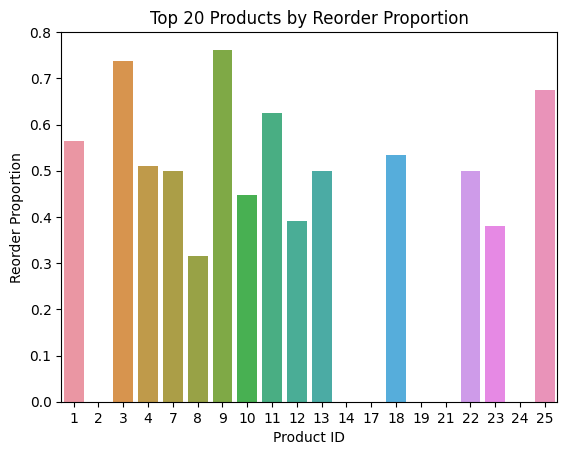

In [55]:
sns.barplot(
    data = reorder_proportion_df.head(20),
    x = 'product_id',
    y = 'reorder_proportion',
) 

plt.title('Top 20 Products by Reorder Proportion')
plt.xlabel('Product ID')
plt.ylabel('Reorder Proportion')
plt.show()

Write your conclusions here

With the above code we were able to check the proportion of all orders, but for better viewing was printed only the first 10 items, where we can see that we have products that are ordered frequently while others the purchase proportion is much lower.

==============================================================

Escreva suas conclusões aqui

Com o código acima conseguimos verificar a proporção de todos os pedidos, porém para melhor visualização foi printado apenas os 10 primeiros itens, onde podemos perceber que temos produtos que são pedidos com frequência enquanto outros a proporção de compra é muito menor.

### [C4] For each customer, what percentage of all their orders are repeated?

==============================================================

`[C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?`

In [56]:
merge_df = df_instacart_orders.merge(df_order_products, on = 'order_id', how = 'inner') # merge of dataframe df_instacart_orders with df _order_products by user_id data / merge do dataframe df_instacart_orders com df_order_products pelos dados de user_id
reorder_proportion_per_client = merge_df.groupby('user_id').agg(total_orders = ('order_id', 'count'), total_reorders = ('reordered', 'sum')) # calculation of purchased and repurchased products / cálculo dos produtos comprados e dos recomprados

In [57]:
reorder_proportion_per_client['reorder_proportion'] = reorder_proportion_per_client['total_reorders'] / reorder_proportion_per_client['total_orders'] # repurchase ratio per customer / proporção de recompra por cliente

reorder_proportion_per_client.head(20)

,total_orders,total_reorders,reorder_proportion
user_id,,,
2,26,1,0.038462
4,2,0,0.000000
5,12,8,0.666667
6,4,0,0.000000
7,14,13,0.928571
11,15,3,0.200000
12,12,3,0.250000
13,23,13,0.565217
14,61,22,0.360656


Write your conclusions here

Within the top 20 we have different types of customers that are: there are no repeat orders, there is some percentage of repeated orders and customers that almost always buy the same items.

==============================================================

Escreva suas conclusões aqui

Dentro dos 20 primeiros temos diferentes tipos de clientes que são: não tem pedidos repetidos, tem alguma porcentagem de pedidos repetidos e clientes que quase sempre compram os mesmos itens.

### [C5] What are the top 20 items that people put in carts before everyone else?

==============================================================

`[C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?`

In [58]:
df_merge = df_order_products.merge(df_products)

first_in_cart = df_merge[df_merge['add_to_cart_order'] == 1]
first_count = first_in_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)
first_count_as_df = first_count.reset_index(name='count')

first_count_as_df.head(20)


,product_id,product_name,count
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


Write your conclusions here

We can identify that once again the product "Bananas" and "Organic Banana Bag" are at the top of the list, these being the ones that are selected for the shopping cart before any other. In addition, we can note that we have in the list various types of milk, as well as other fruits.

==============================================================

Escreva suas conclusões aqui

Podemos identificar que mais uma vez o produto "Banana" e o "Saco de Bananas Orgânico" estão em primeiro da lista, sendo estes os que são selecionados para o carrinho de compras antes de qualquer outro. Além disso, podemos notar que temos na listagem diversos tipos de leites, bem como outras frutas.

# Overall project conclusion:

==============================================================

`Conclusão geral do projeto:`

After a general analysis of the data, the volume of purchases is higher on Sunday and Monday, as well as we can see that there is a large volume of shopping between 10h and 16h, an average volume of purchase in the hours: 07h / 08h / 18h / 19h and little movement in the other hours, having the lowest index in the times of 03h and 04h. Also related to days and times, it was possible to identify a difference in distribution between Wednesday and Saturday, being noticeable between 10h and 15h.

Please also note that most customers make few orders, the number of customers with recurring orders being lower and we can add to this information that on average there is a difference of 30 days between one order and another made by the same customer.

On the products, on average 10 products are ordered per purchase, there are different types of products that are requested and as seen in the B3 analysis most of the items on the list are vegetables or fruits. In addition, in the top 20 products we have products that are purchased with recurrence.

==============================================================

Após uma análise geral dos dados, o o volume de compras é maior no domingo e na segunda-feira, bem como conseguimos perceber que existe um grande volume de compras entre às 10h e 16h, um volume de compra médios nos horários: 07h / 08h / 18h / 19h e pouco movimento nos demais horários, tendo o menor índice nos horários das 03h e 04h. Ainda relacionado a dias e horários, foi possível identificar uma diferença na distribuição entre quartafeira e sábado, sendo notável entre 10h às 15h.

Percebesse também de que a maioria dos clientes fazem poucos pedidos, sendo menor o número de clientes com pedidos recorrentes e podemos adicionar a essa informação que em média existe uma diferença de 30 dias entre um pedido e outro feito por um mesmo cliente.

Sobre os produtos, em média são pedidos 10 produtos por compra, há diferentes tipos de produtos que são pedidos e como visto na análise B3 a maioria dos itens na lista são verduras ou frutas. Além disso, no top 20 produtos temos produtos que são comprados com recorrência.